In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
train=pd.read_csv('train_V2.csv')

In [3]:
train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [206]:
train.corr()['winPlacePerc'].sort_values()

killPlace         -0.719363
matchDuration     -0.005173
winPoints          0.007020
killPoints         0.012865
rankPoints         0.013568
teamKills          0.016113
roadKills          0.034536
maxPlace           0.037278
numGroups          0.039524
vehicleDestroys    0.073460
swimDistance       0.149652
revives            0.242335
headshotKills      0.282494
DBNOs              0.283141
assists            0.302285
rideDistance       0.343083
killStreaks        0.377948
longestKill        0.410735
kills              0.426806
heals              0.429423
damageDealt        0.446708
weaponsAcquired    0.593383
boosts             0.634893
distance           0.677295
walkDistance       0.811111
winPlacePerc       1.000000
Name: winPlacePerc, dtype: float64

In [227]:
train.columns

Index(['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'killPlace', 'killPoints', 'kills', 'killStreaks', 'longestKill',
       'matchDuration', 'matchType', 'maxPlace', 'numGroups', 'rankPoints',
       'revives', 'roadKills', 'teamKills', 'vehicleDestroys',
       'weaponsAcquired', 'winPoints', 'winPlacePerc', 'distance'],
      dtype='object')

In [228]:
train.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,numGroups,rankPoints,revives,roadKills,teamKills,vehicleDestroys,weaponsAcquired,winPoints,winPlacePerc,distance
count,4.445181e+06,4.445181e+06,4.445181e+06,4.445181e+06,4.445181e+06,4.445181e+06,4.445181e+06,4.445181e+06,4.445181e+06,4.445181e+06,...,4.445181e+06,4.445181e+06,4.445181e+06,4.445181e+06,4.445181e+06,4.445181e+06,4.445181e+06,4.445181e+06,4.445180e+06,4.445181e+06
mean,2.327925e-01,1.106393e+00,1.302657e+02,6.560174e-01,2.253249e-01,1.367983e+00,4.761082e+01,5.050067e+02,9.204793e-01,5.433803e-01,...,4.301549e+01,8.920382e+02,1.644271e-01,3.492546e-03,2.382198e-02,7.914413e-03,3.654855e+00,6.064294e+02,4.728022e-01,1.763827e+03
std,5.822981e-01,1.713943e+00,1.678505e+02,1.130455e+00,5.872351e-01,2.669222e+00,2.745893e+01,6.275274e+02,1.526964e+00,7.095333e-01,...,2.328523e+01,7.366409e+02,4.693962e-01,7.334190e-02,1.669156e-01,9.259054e-02,2.416494e+00,7.396941e+02,3.073716e-01,2.178196e+03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,2.700000e+01,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e-01,1.581000e+02
50%,0.000000e+00,0.000000e+00,8.420000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,3.000000e+01,1.443000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,4.583000e-01,7.881000e+02
75%,0.000000e+00,2.000000e+00,1.859000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,...,4.700000e+01,1.500000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,1.495000e+03,7.407000e-01,2.728000e+03
max,1.000000e+01,1.500000e+01,2.669000e+03,1.900000e+01,1.100000e+01,4.500000e+01,1.010000e+02,2.170000e+03,2.200000e+01,1.800000e+01,...,1.000000e+02,5.910000e+03,3.900000e+01,1.800000e+01,6.000000e+00,5.000000e+00,2.360000e+02,2.013000e+03,1.000000e+00,2.094560e+04


In [83]:
match_type={'squad-fpp':'squad', 'duo':'duo', 'solo-fpp':'solo', 'squad':'squad', 'duo-fpp':'duo', 'solo':'solo',
       'normal-squad-fpp':'squad', 'crashfpp':'crash', 'flaretpp':'crash', 'normal-solo-fpp':'solo',
       'flarefpp':'crash', 'normal-duo-fpp':'duo', 'normal-duo':'duo', 'normal-squad':'squad',
       'crashtpp':'crash', 'normal-solo':'solo'}

train['matchType']=train['matchType'].map(match_type)

<AxesSubplot:xlabel='matchType', ylabel='count'>

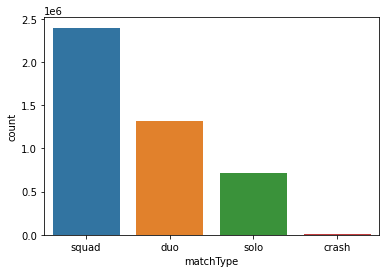

In [230]:
sns.countplot(x=train['matchType'])

In [84]:
#handling assists
#dropping the outliers
train.drop(train[train['assists']>10].index,inplace=True)
train.drop(train[(train['assists']>7) & (train['winPlacePerc']<0.5)].index,inplace=True)
train.drop(train[(train['assists']==8) & (train['winPlacePerc']<0.6)].index,inplace=True)
train.drop(train[(train['assists']==9) & (train['winPlacePerc']<0.65)].index,inplace=True)
train.drop(train[(train['assists']==10) & (train['winPlacePerc']<0.6)].index,inplace=True)

<AxesSubplot:xlabel='assists', ylabel='winPlacePerc'>

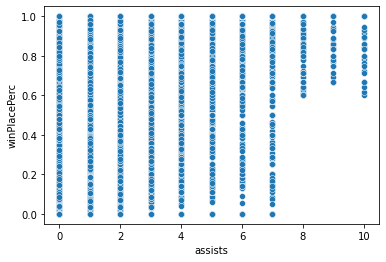

In [71]:
sns.scatterplot(x=train['assists'],y=train['winPlacePerc'])

In [85]:
#handling boosts
#dropping the outliers
train.drop(train[train['boosts']>15].index,inplace=True)
train.drop(train[(train['boosts']==3) & (train['winPlacePerc']<0.1)].index,inplace=True)
train.drop(train[(train['boosts']==6) & (train['winPlacePerc']<0.2)].index,inplace=True)
train.drop(train[(train['boosts']==7) & (train['winPlacePerc']<0.2)].index,inplace=True)
train.drop(train[(train['boosts']==8) & (train['winPlacePerc']<0.3)].index,inplace=True)
train.drop(train[(train['boosts']==9) & (train['winPlacePerc']<0.35)].index,inplace=True)
train.drop(train[(train['boosts']==10) & (train['winPlacePerc']<0.5)].index,inplace=True)
train.drop(train[(train['boosts']==11) & (train['winPlacePerc']<0.5)].index,inplace=True)
train.drop(train[(train['boosts']==12) & (train['winPlacePerc']<0.6)].index,inplace=True)
train.drop(train[(train['boosts']==13) & (train['winPlacePerc']<0.6)].index,inplace=True)
train.drop(train[(train['boosts']==14) & (train['winPlacePerc']<0.6)].index,inplace=True)
train.drop(train[(train['boosts']==15) & (train['winPlacePerc']<0.6)].index,inplace=True)

<AxesSubplot:xlabel='boosts', ylabel='winPlacePerc'>

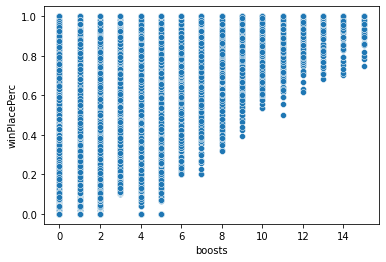

In [74]:
sns.scatterplot(x=train['boosts'],y=train['winPlacePerc'])

In [102]:
#handling damagedealt outlier
train.drop(train[(train['damageDealt']>3000) & (train['winPlacePerc']>0.0)].index,inplace=True)
train.drop(train[(train['damageDealt']>1500) & (train['winPlacePerc']==0.0)].index,inplace=True)
train.drop(train[(train['damageDealt']>1000) & (train['winPlacePerc']==0.1)].index,inplace=True)
train.drop(train[(train['damageDealt']>2000) & (train['winPlacePerc']<0.8)].index,inplace=True)
train.drop(train[(train['damageDealt']>1500) & (train['winPlacePerc']<0.5)].index,inplace=True)
train.drop(train[(train['damageDealt']>2700) & (train['winPlacePerc']>0.75)].index,inplace=True)
train.drop(train[(train['damageDealt']>1000) & (train['winPlacePerc']==0.0)].index,inplace=True)

<AxesSubplot:xlabel='damageDealt', ylabel='winPlacePerc'>

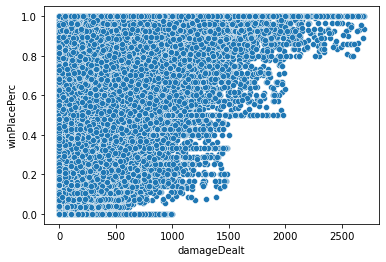

In [107]:
sns.scatterplot(x=train['damageDealt'],y=train['winPlacePerc'])

In [119]:
#handling dbnos
train.drop(train[(train['DBNOs']>19.5)].index,inplace=True)
train.drop(train[(train['DBNOs']>5) & (train['winPlacePerc']==0.0)].index,inplace=True)
train.drop(train[(train['DBNOs']>11) & (train['winPlacePerc']<0.2)].index,inplace=True)
train.drop(train[(train['DBNOs']>13) & (train['winPlacePerc']<0.6)].index,inplace=True)
train.drop(train[(train['DBNOs']>15) & (train['winPlacePerc']<0.8)].index,inplace=True)

<AxesSubplot:xlabel='DBNOs', ylabel='winPlacePerc'>

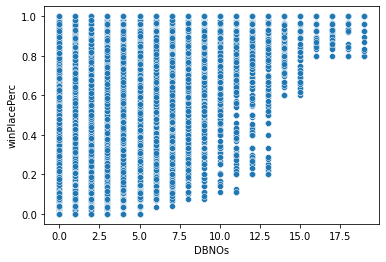

In [135]:
sns.scatterplot(x=train['DBNOs'],y=train['winPlacePerc'])

<AxesSubplot:xlabel='headshotKills', ylabel='winPlacePerc'>

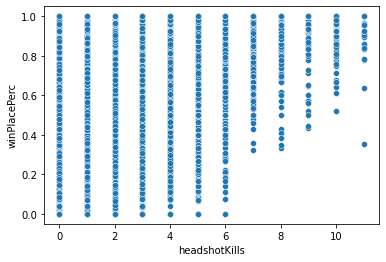

In [142]:
sns.scatterplot(x=train['headshotKills'],y=train['winPlacePerc'])

In [139]:
#handling headshotskills
train.drop(train[(train['headshotKills']>11)].index,inplace=True)
train.drop(train[(train['headshotKills']>6) & (train['winPlacePerc']<0.3)].index,inplace=True)
train.drop(train[(train['headshotKills']>10) & (train['winPlacePerc']<0.8)].index,inplace=True)
train.drop(train[(train['headshotKills']==10) & (train['winPlacePerc']<0.6)].index,inplace=True)

<AxesSubplot:xlabel='headshotKills', ylabel='winPlacePerc'>

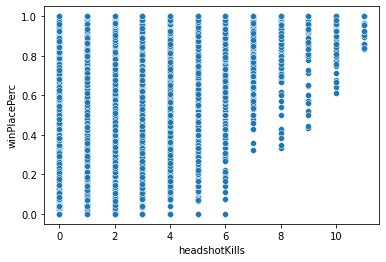

In [144]:
sns.scatterplot(x=train['headshotKills'],y=train['winPlacePerc'])

In [ ]:
#handling heals
train.drop(train[(train['heals']>45)].index,inplace=True)
train.drop(train[(train['heals']>40) & (train['winPlacePerc']<0.8)].index,inplace=True)
train.drop(train[(train['heals']>35) & (train['winPlacePerc']<0.65)].index,inplace=True)
train.drop(train[(train['heals']>30) & (train['winPlacePerc']<0.6)].index,inplace=True)
train.drop(train[(train['heals']>20) & (train['winPlacePerc']<0.4)].index,inplace=True)
train.drop(train[(train['heals']>10) & (train['winPlacePerc']<0.1)].index,inplace=True)

<AxesSubplot:xlabel='heals', ylabel='winPlacePerc'>

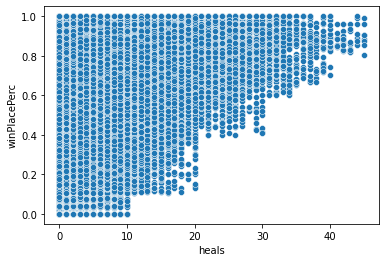

In [161]:
sns.scatterplot(x=train['heals'],y=train['winPlacePerc'])

In [166]:
#handling killplace
train.drop(train[(train['killPlace']>70) & (train['winPlacePerc']>0.6)].index,inplace=True)
train.drop(train[(train['killPlace']>63) & (train['winPlacePerc']>0.8)].index,inplace=True)
train.drop(train[(train['killPlace']>80) & (train['winPlacePerc']>0.4)].index,inplace=True)

<AxesSubplot:xlabel='killPlace', ylabel='winPlacePerc'>

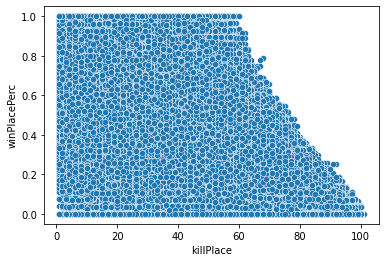

In [172]:
sns.scatterplot(x=train['killPlace'],y=train['winPlacePerc'])

In [181]:
#handling kills
train.drop(train[(train['kills']>22)].index,inplace=True)
train.drop(train[(train['kills']>18) & (train['winPlacePerc']<0.7)].index,inplace=True)
train.drop(train[(train['kills']>15) & (train['winPlacePerc']<0.5)].index,inplace=True)
train.drop(train[(train['kills']>10) & (train['winPlacePerc']<0.1)].index,inplace=True)
train.drop(train[(train['kills']>13) & (train['winPlacePerc']<0.4)].index,inplace=True)

<AxesSubplot:xlabel='kills', ylabel='winPlacePerc'>

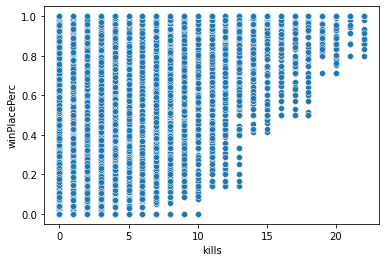

In [204]:
sns.scatterplot(x=train['kills'],y=train['winPlacePerc'])

In [205]:
train['distance']=train['swimDistance']+train['rideDistance']+train['walkDistance']

In [ ]:
#handling distance with outlier
train.drop(train[(train['distance']>21000)].index,inplace=True)
train.drop(train[(train['distance']>18000) & (train['winPlacePerc']<0.5)].index,inplace=True)
train.drop(train[(train['distance']>13000) & (train['winPlacePerc']<0.3)].index,inplace=True)

<AxesSubplot:xlabel='distance', ylabel='winPlacePerc'>

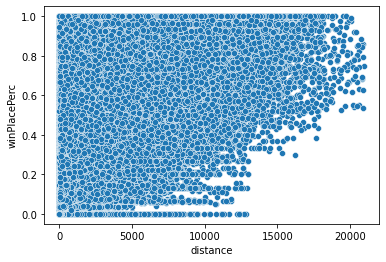

In [223]:
sns.scatterplot(x=train['distance'],y=train['winPlacePerc'])

In [224]:
#dropping unwanted columns
train.drop(['rideDistance','swimDistance','walkDistance'],axis=1,inplace=True)
train.drop(['Id', 'groupId', 'matchId'],axis=1,inplace=True)

In [231]:
train.to_csv('train_V3.csv',index_label=False)

In [234]:
del temp

In [238]:
test=pd.read_csv('test_V2.csv')

In [241]:
test.head()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,maxPlace,numGroups,rankPoints,revives,roadKills,teamKills,vehicleDestroys,weaponsAcquired,winPoints,distance
0,0,0,51.46,0,0,0,73,0,0,0,...,28,28,1500,0,0,0,0,1,0,588.0
1,0,4,179.10,0,0,2,11,0,2,1,...,48,47,1503,2,0,0,0,6,0,6686.0
2,1,0,23.40,0,0,4,49,0,0,0,...,28,27,1565,0,0,0,0,4,0,787.8
3,0,0,65.52,0,0,0,54,0,0,0,...,45,44,1465,0,0,0,0,3,0,1812.0
4,0,4,330.20,1,2,1,7,0,3,1,...,28,27,1480,1,0,0,0,4,0,2963.0


In [240]:
test['matchType']=test['matchType'].map(match_type)
test['distance']=test['swimDistance']+test['rideDistance']+test['walkDistance']
test.drop(['rideDistance','swimDistance','walkDistance'],axis=1,inplace=True)
test.drop(['Id', 'groupId', 'matchId'],axis=1,inplace=True)

In [242]:
test.to_csv('test_V3.csv',index_label=False)